# Import Libraries

In [1]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import sklearn

# Original audio file

In [2]:
audio_path='audio/recordings/english1.mp3'
x, sr = librosa.load(audio_path,offset=0,duration=1.18)

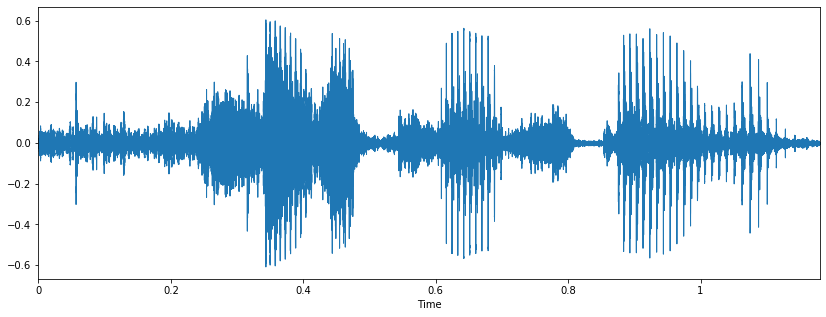

In [3]:
fg1=plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
fg1.savefig('figures/original.jpg')

# ZCR

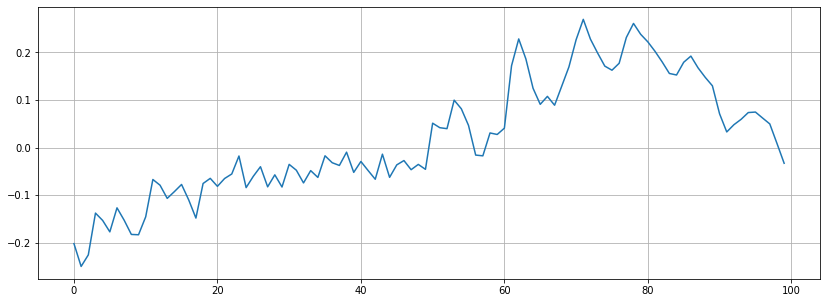

In [4]:
n0 = 9000
n1 = 9100
fg2=plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
fg2.savefig('figures/zcr.jpg')

In [5]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4


C:\Users\Amit\Anaconda3\lib\site-packages\librosa\core\audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


# Spectral Centroid

In [6]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(51,)

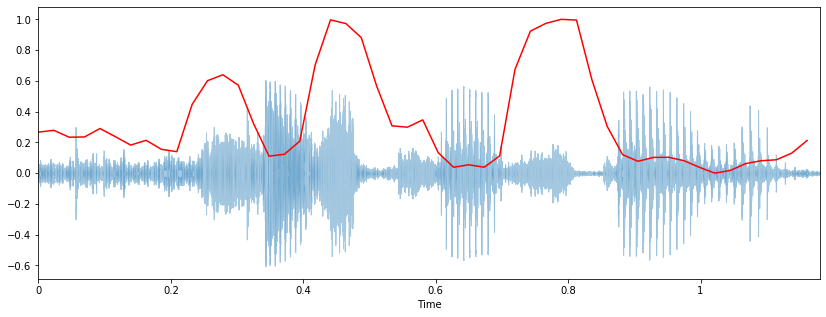

In [7]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
fg3=plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
fg3.savefig('figures/centroid.jpg')

# Spectral Rolloff

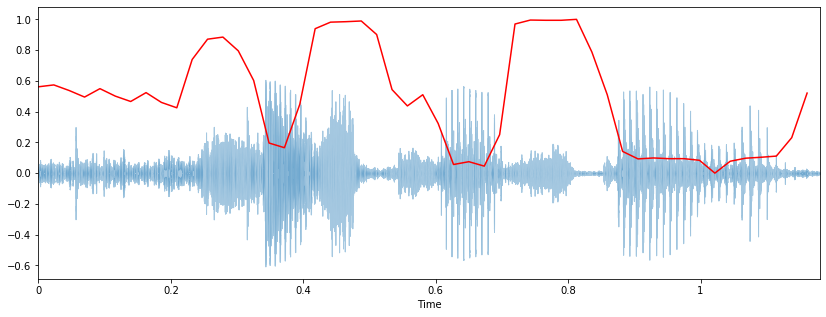

In [8]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
fg4=plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
fg4.savefig('figures/rolloff.jpg')

# Spectral Bandwidth

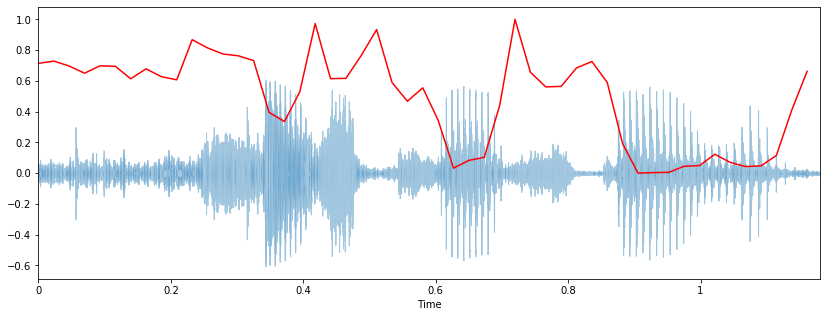

In [9]:
spectral_bw = librosa.feature.spectral_bandwidth(x, sr=sr)[0]
fg5=plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bw), color='r')
fg5.savefig('figures/bw.jpg')

# MFCC

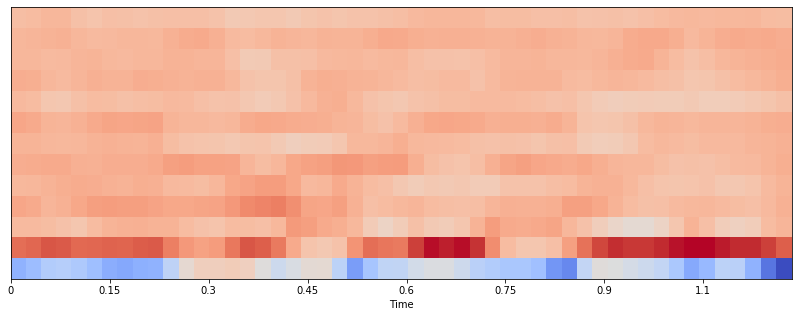

In [10]:
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=13)
fg6=plt.figure(figsize=(14, 5))
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
fg6.savefig('figures/mfcc.jpg')

# Chroma Frequencies

C:\Users\Amit\Anaconda3\lib\site-packages\librosa\util\utils.py:1005: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])


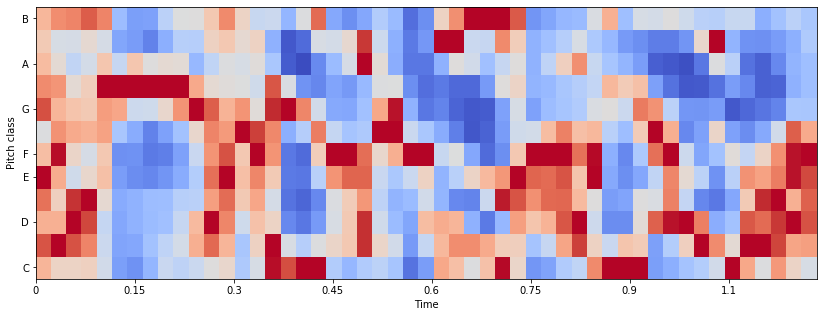

In [11]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
fg7 =plt.figure(figsize=(14, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fg7.savefig('figures/chroma.jpg')